In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

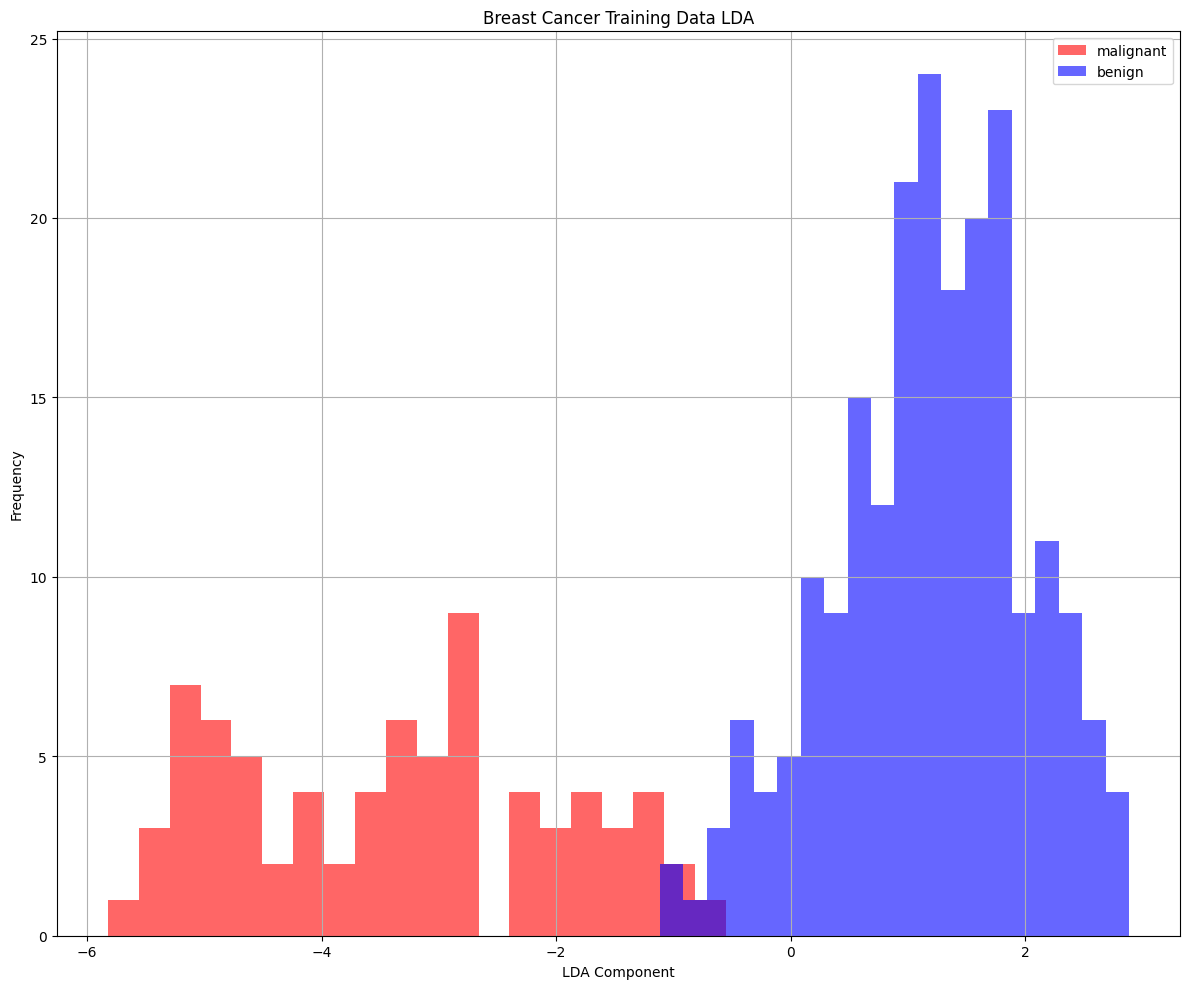

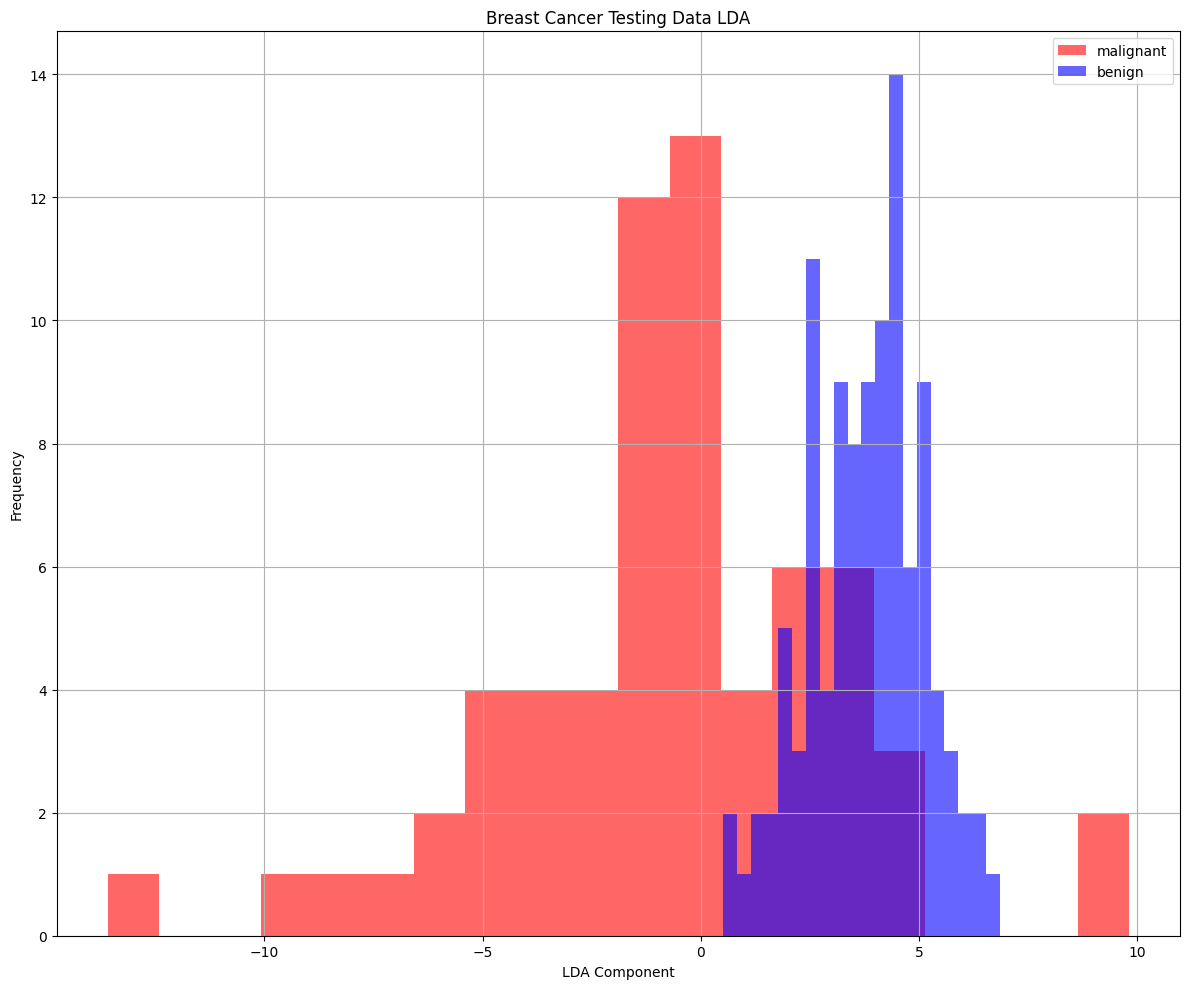

[I 2025-04-27 11:33:21,967] A new study created in memory with name: no-name-ba06e6c2-f2b1-459a-968a-8fdff6627638
[I 2025-04-27 11:33:31,465] Trial 0 finished with value: 0.9825771324863884 and parameters: {'n_estimators': 4786, 'max_depth': 15, 'learning_rate': 0.028488574739567778, 'subsample': 0.7828746930724643, 'colsample_bytree': 0.5947686519951065, 'gamma': 2.4010434563236287, 'reg_alpha': 2.5312399425323883e-08, 'reg_lambda': 1.712031105605945e-07}. Best is trial 0 with value: 0.9825771324863884.
[I 2025-04-27 11:34:19,686] Trial 1 finished with value: 0.9861464004839686 and parameters: {'n_estimators': 9805, 'max_depth': 15, 'learning_rate': 0.00111015078475848, 'subsample': 0.5229607106929834, 'colsample_bytree': 0.8537420979390218, 'gamma': 2.036989920370006, 'reg_alpha': 0.00010106873634672932, 'reg_lambda': 0.210356993456457}. Best is trial 1 with value: 0.9861464004839686.
[I 2025-04-27 11:35:16,460] Trial 2 finished with value: 0.9825771324863883 and parameters: {'n_esti

Best trial:
Accuracy: 0.989534180278282
Best hyperparameters:  {'n_estimators': 4247, 'max_depth': 8, 'learning_rate': 0.020792211607460465, 'subsample': 0.7358740380093611, 'colsample_bytree': 0.554538601311635, 'gamma': 3.7850063688535327, 'reg_alpha': 4.715250730154678e-08, 'reg_lambda': 0.005450951378598656}


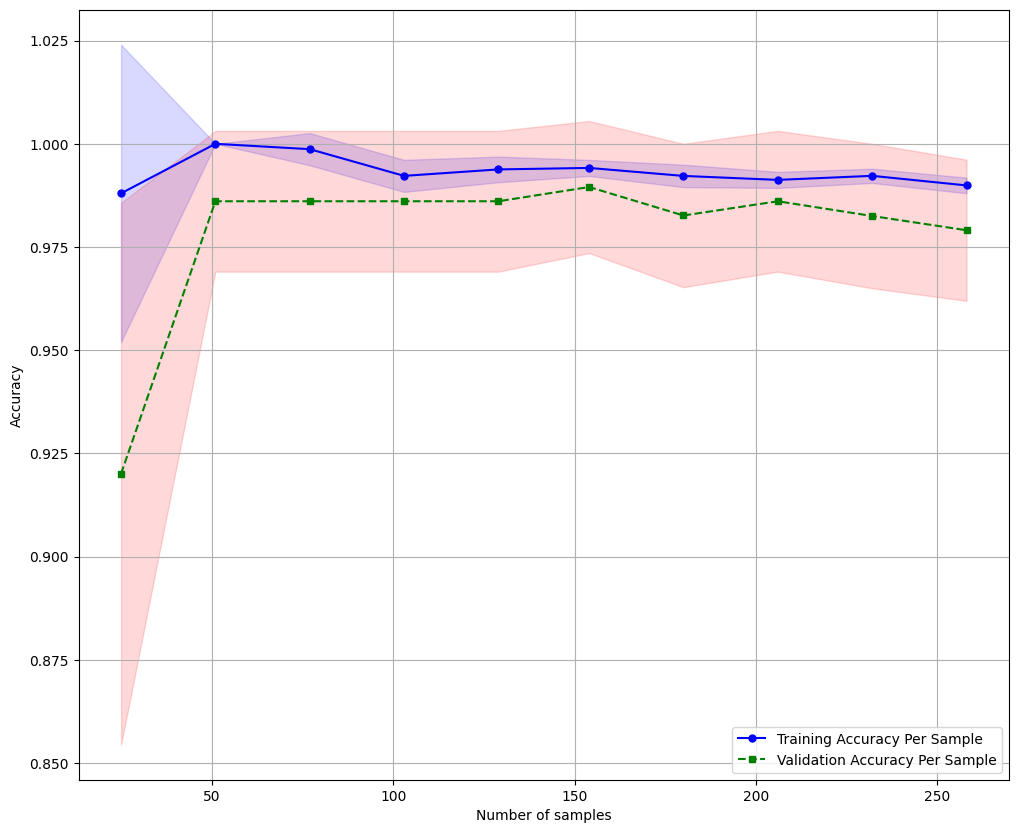

Confusion Matrix
[[ 28  36]
 [  0 107]]
Accuracy: 0.7895, Precision: 0.7483, Recall: 1.0000, F1: 0.8560, AUC: 0.7344


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)